In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q qiskit_aer
!pip install -q qiskit_ibm_runtime

In [ ]:
!pip install --upgrade qiskit


In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from qiskit import transpile

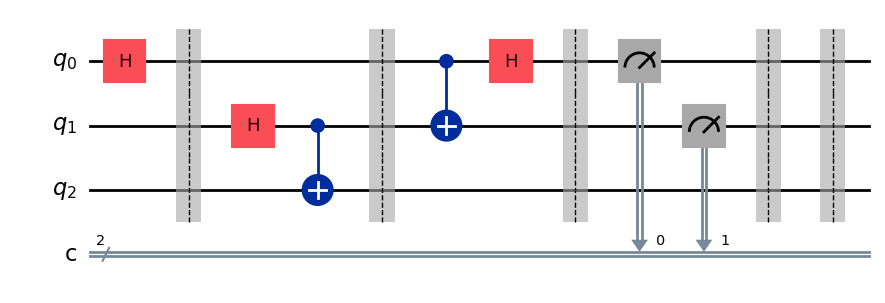

In [9]:
# Step 1: Create quantum and classical registers- to instantiate several bits together

# q[0]: state to teleport, q[1]: Alice's entangled qubit, q[2]: Bob's entangled qubit
qreg = QuantumRegister(3, 'q')

creg = ClassicalRegister(2, 'c')  #classical bits to store measurement results

qc = QuantumCircuit(qreg, creg) #creates a QuantumCircuit using explicit register objects
#QuantumCircuit is a hybrid framework that integrates quantum and classical bits
#can apply quantum gates on qubits, measure qubits and store results in classical bits, use classical bits to control quantum operations


# Step 2: Prepare the state to be teleported on q[0] (create superposition)

qc.h(qreg[0])
qc.barrier() #to prevent optimisation(reordering of gates etc.)


# Step 3: Create Bell pair between q[1] and q[2] (Alice and Bob's shared state Psi00)

qc.h(qreg[1])
qc.cx(qreg[1], qreg[2])
qc.barrier()


# Step 4: Alice performs Bell measurement on her unknown state and her part of shared state
# this causes her combined state Psi(SA) to collapse to one of the four Bell states(Psi(ij)) and she records the classical bits i,j

qc.cx(qreg[0], qreg[1])
qc.h(qreg[0])
qc.barrier()

#Measure qubit q[0] and store the result in classical bit c[0]
qc.measure(qreg[0], creg[0])
#Measure qubit q[1] and store the result in classical bit c[1]
qc.measure(qreg[1], creg[1])

qc.barrier()


# Step 5: Bob applies operations based on Alice’s measurements

# apply PauliX if measurement is 01
if creg[0] == 0 and creg[1] ==1:
    qc.x(2)

# apply PauliZ if measurement is 10
elif creg[0] == 1 and creg[1] ==0:
    qc.z(2)

# apply PauliX then PauliZ if measurement is 11
elif creg[0] == 1 and creg[1] ==1:
    qc.x(2)
    qc.z(2)

qc.barrier()

qc.draw('mpl')

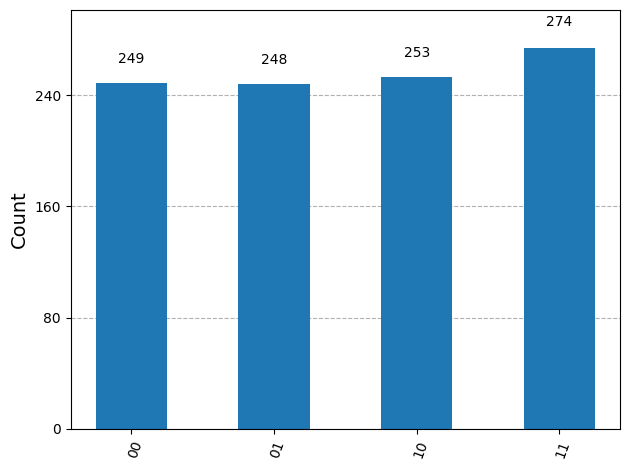

In [11]:

sim = AerSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

11


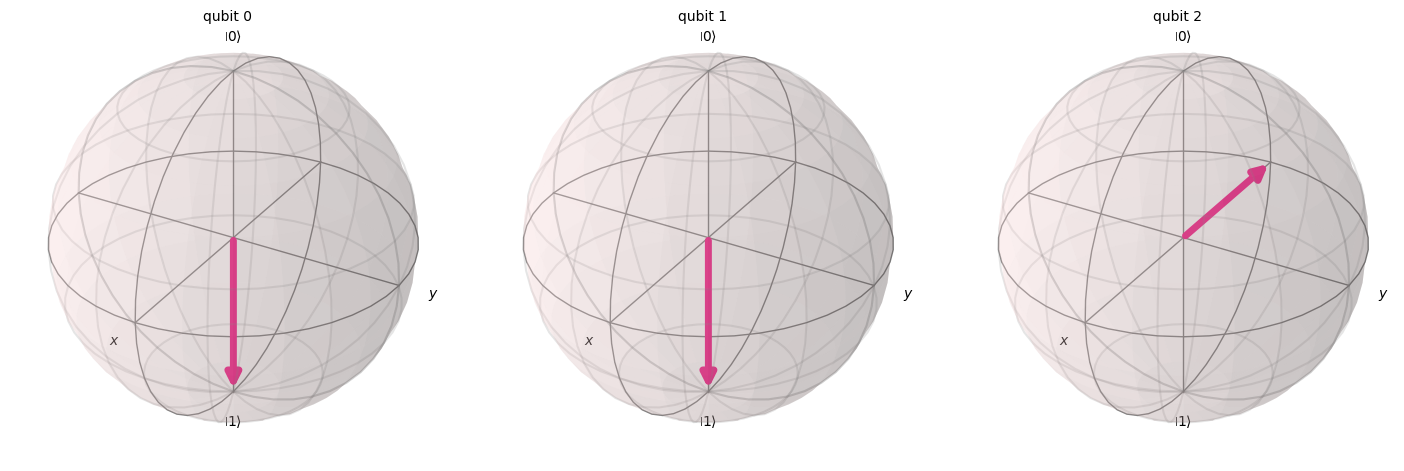

In [14]:
# Rebuild circuit without measurement for statevector simulation
qc_sv = QuantumCircuit(3)
qc_sv.h(0)
qc_sv.h(1)
qc_sv.cx(1, 2)
qc_sv.cx(0, 1)
qc_sv.h(0)

# Measure q0 and q1 virtually (probabilistic measurement, without collapsing the state)
sv = Statevector.from_instruction(qc_sv)
measurement_results, sv_after_measurement = sv.measure([0, 1])
print(measurement_results)
plot_bloch_multivector(sv_after_measurement)